<a href="https://colab.research.google.com/github/vcautela/Linear_Regression_Introduction/blob/main/Case_3_Regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install chart-studio
!pip install -U kaleido

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
base_casa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Case 3 - Regressão Linear /USA_Housing.csv", sep = ",")
base_casa.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [5]:
base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
round(base_casa.describe(), 3)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count          5000.000             5000.000                   5000.000   
mean          68583.109                5.977                      6.988   
std           10657.991                0.991                      1.006   
min           17796.631                2.644                      3.236   
25%           61480.562                5.322                      6.299   
50%           68804.286                5.970                      7.003   
75%           75783.339                6.651                      7.666   
max          107701.748                9.519                     10.760   

       Avg. Area Number of Bedrooms  Area Population        Price  
count                      5000.000         5000.000     5000.000  
mean                          3.981        36163.516  1232072.654  
std                           1.234         9925.650   353117.627  
min                           2.000          172.611    15938.658  
25%                           3.140        29403.929   997577.135  
50%                           4.050        36199.407  1232669.378  
75%                           4.490        42861.291  1471210.204  
max                           6.500        69621.713  2469065.594

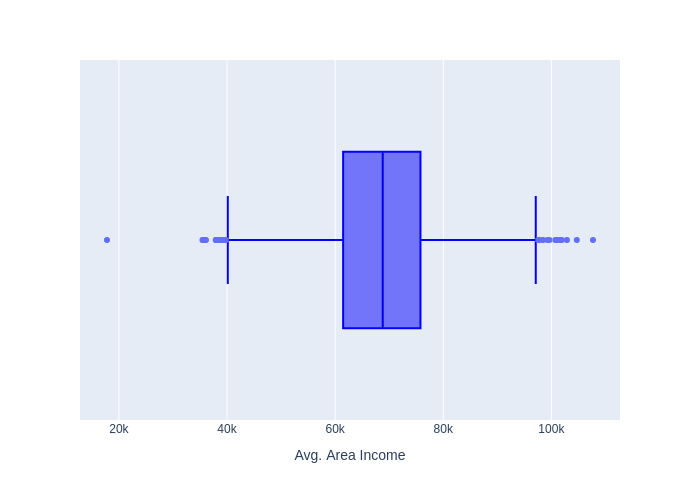

In [7]:
fig = px.box(base_casa, x="Avg. Area Income")
fig.update_traces(line_color="blue")
fig.show(renderer='png')

In [8]:
base_casa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
base_casa = base_casa.rename(columns={"Avg. Area Income":"Avg_Area_Income", "Avg. Area House Age":"Avg_Area_House_Age","Avg. Area Number of Rooms":"Avg_Area_Number_of_Rooms", "Avg. Area Number of Bedrooms":"Avg_Area_Number_of_Bedrooms","Area Population":"Area_Population"})
base_casa.head()

Avg_Area_Income  Avg_Area_House_Age  Avg_Area_Number_of_Rooms  \
0     79545.458574            5.682861                  7.009188   
1     79248.642455            6.002900                  6.730821   
2     61287.067179            5.865890                  8.512727   
3     63345.240046            7.188236                  5.586729   
4     59982.197226            5.040555                  7.839388   

   Avg_Area_Number_of_Bedrooms  Area_Population         Price  \
0                         4.09     23086.800503  1.059034e+06   
1                         3.09     40173.072174  1.505891e+06   
2                         5.13     36882.159400  1.058988e+06   
3                         3.26     34310.242831  1.260617e+06   
4                         4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [10]:
base_casa.drop(["Address"], axis=1, inplace=True)
base_casa.head()

Avg_Area_Income  Avg_Area_House_Age  Avg_Area_Number_of_Rooms  \
0     79545.458574            5.682861                  7.009188   
1     79248.642455            6.002900                  6.730821   
2     61287.067179            5.865890                  8.512727   
3     63345.240046            7.188236                  5.586729   
4     59982.197226            5.040555                  7.839388   

   Avg_Area_Number_of_Bedrooms  Area_Population         Price  
0                         4.09     23086.800503  1.059034e+06  
1                         3.09     40173.072174  1.505891e+06  
2                         5.13     36882.159400  1.058988e+06  
3                         3.26     34310.242831  1.260617e+06  
4                         4.23     26354.109472  6.309435e+05

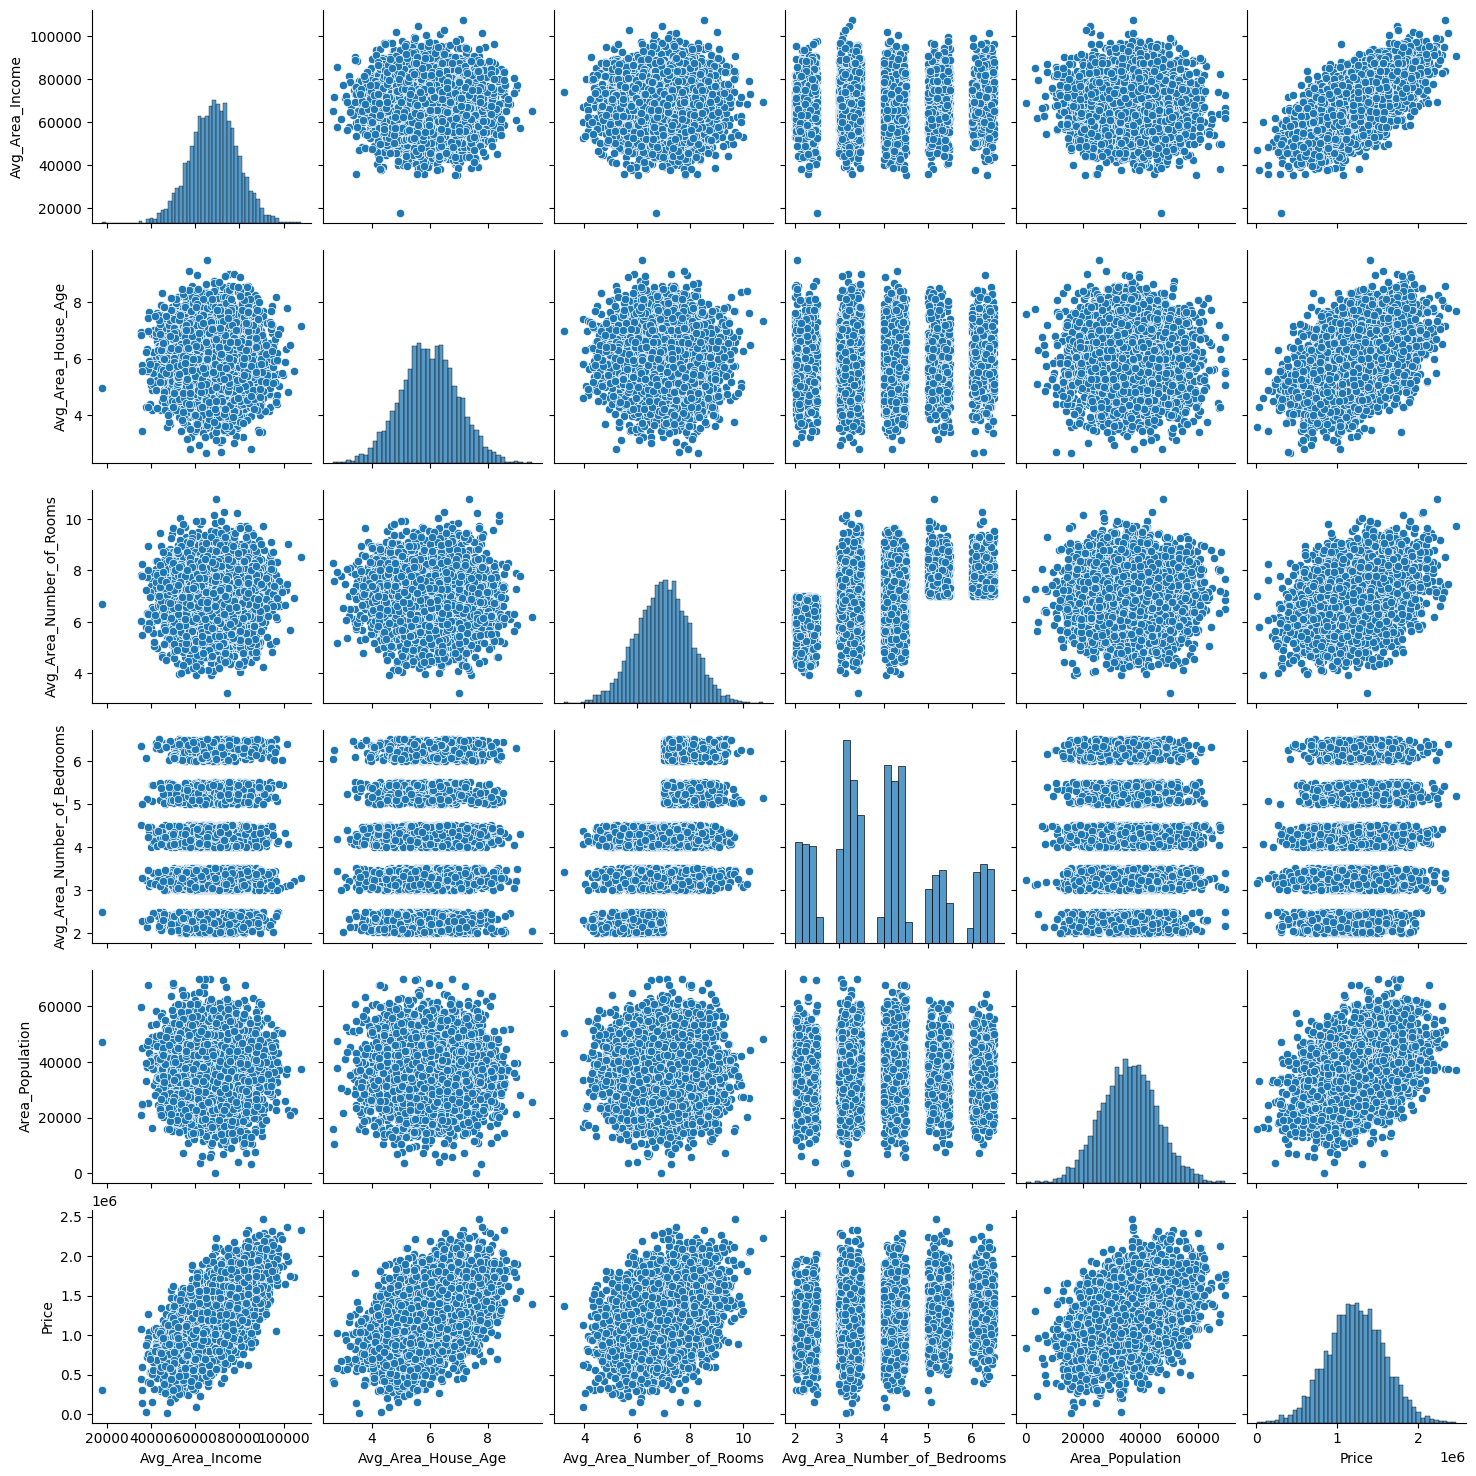

In [11]:
sns.pairplot(base_casa)

In [12]:
base_casa.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

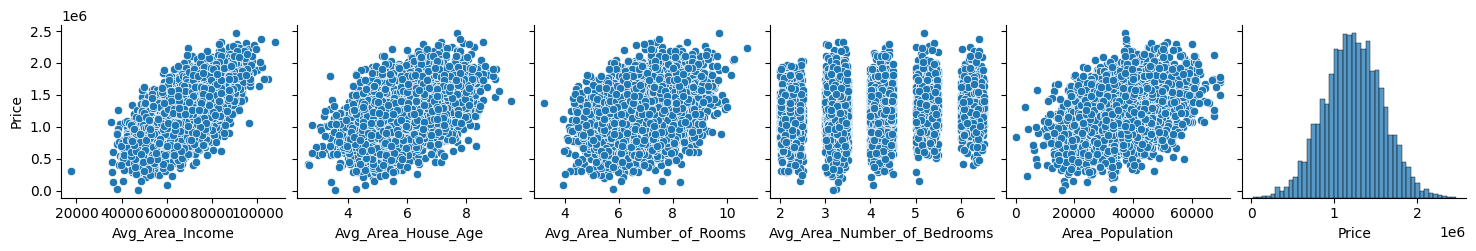

In [13]:
sns.pairplot(base_casa, x_vars=['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'], y_vars='Price')

In [14]:
base_casa.corr()

Avg_Area_Income  Avg_Area_House_Age  \
Avg_Area_Income                     1.000000           -0.002007   
Avg_Area_House_Age                 -0.002007            1.000000   
Avg_Area_Number_of_Rooms           -0.011032           -0.009428   
Avg_Area_Number_of_Bedrooms         0.019788            0.006149   
Area_Population                    -0.016234           -0.018743   
Price                               0.639734            0.452543   

                             Avg_Area_Number_of_Rooms  \
Avg_Area_Income                             -0.011032   
Avg_Area_House_Age                          -0.009428   
Avg_Area_Number_of_Rooms                     1.000000   
Avg_Area_Number_of_Bedrooms                  0.462695   
Area_Population                              0.002040   
Price                                        0.335664   

                             Avg_Area_Number_of_Bedrooms  Area_Population  \
Avg_Area_Income                                 0.019788        -0.016234   
Avg_Area_House_Age                              0.006149        -0.018743   
Avg_Area_Number_of_Rooms                        0.462695         0.002040   
Avg_Area_Number_of_Bedrooms                     1.000000        -0.022168   
Area_Population                                -0.022168         1.000000   
Price                                           0.171071         0.408556   

                                Price  
Avg_Area_Income              0.639734  
Avg_Area_House_Age           0.452543  
Avg_Area_Number_of_Rooms     0.335664  
Avg_Area_Number_of_Bedrooms  0.171071  
Area_Population              0.408556  
Price                        1.000000

<Axes: >

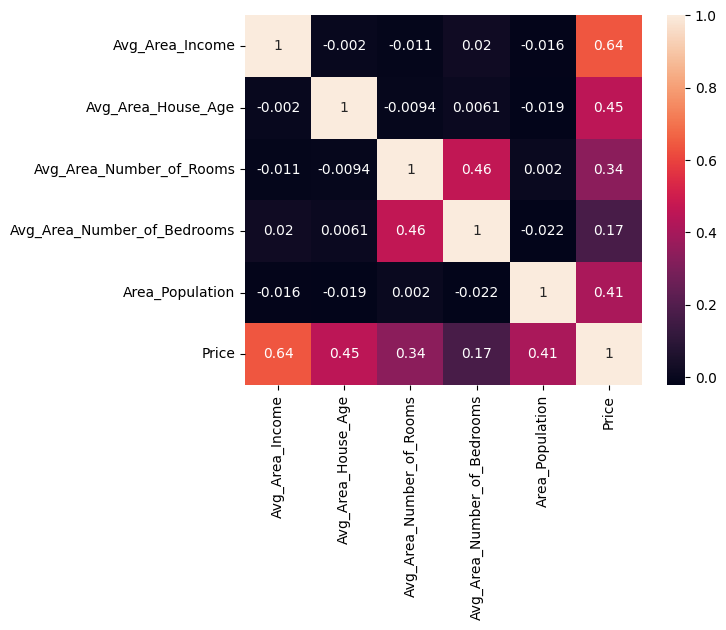

In [15]:
# parametro annot traz os valores no reatmap
sns.heatmap(base_casa.corr(), annot=True)

<Axes: xlabel='Price', ylabel='Count'>

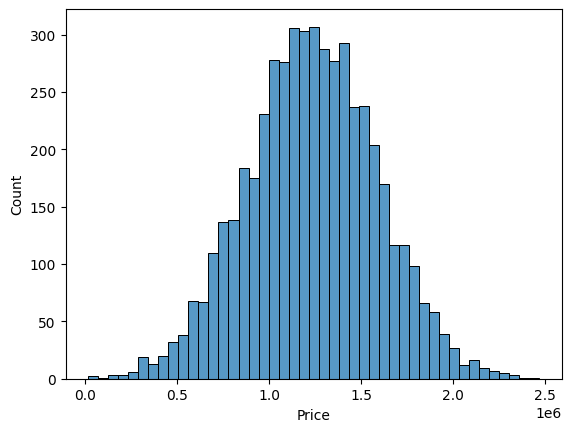

In [16]:
  sns.histplot(base_casa['Price'])

In [17]:
base_casa.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

In [18]:
X = base_casa[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population']]

Y = base_casa[['Price']]

In [19]:
#train_size -> 70% para base de treino, 30% para teste;
#random_state -> embaralha os dados
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3,random_state = 42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3500, 5)
(1500, 5)
(3500, 1)
(1500, 1)


In [21]:
lm = LinearRegression()

In [22]:
#treinando o modelo
lm.fit(X_train, Y_train)

LinearRegression()

In [23]:
y_pred = lm.predict(X_test)

In [24]:
# r2 score: quanto maior, maior é a possibilidade de acerto. Comparando Y_test com ypred (resultado real com predição)
r = r2_score(Y_test, y_pred)

In [25]:
print("r2_score:", r)

r2_score: 0.914681849875402


Text(0, 0.5, 'Preço do Imóvel.')

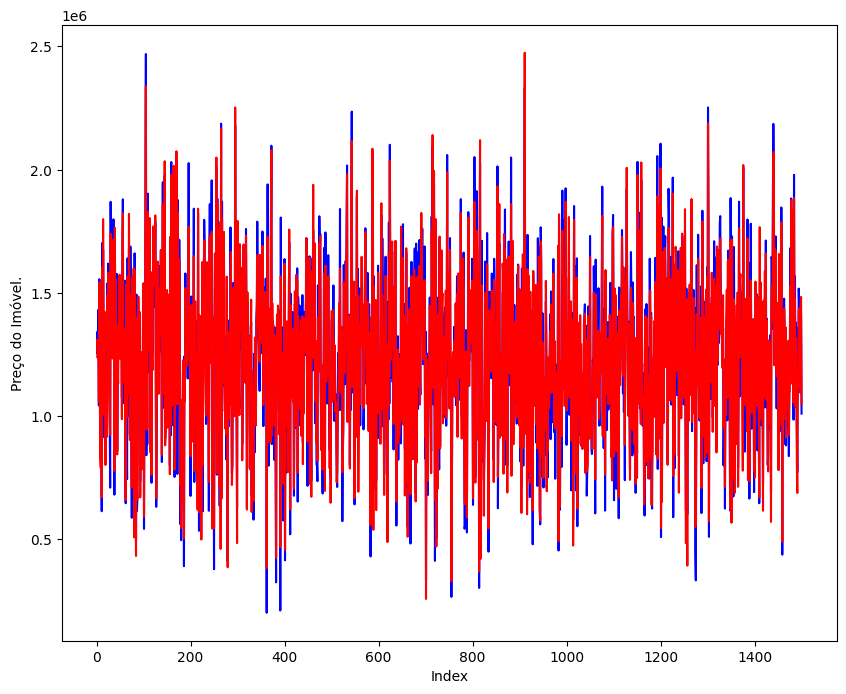

In [26]:
c = [i for i in range (1, 1501, 1)]
fig = plt.figure(figsize=(10, 8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color="red")
plt.xlabel("Index")
plt.ylabel("Preço do Imóvel.")

In [27]:
Avg_Area_Income = 50
Avg_Area_House_Age = 30
Avg_Area_Number_of_Rooms = 7
Avg_Area_Number_of_Bedrooms = 5
Area_Population = 200
entrada = [[Avg_Area_Income, Avg_Area_House_Age, Avg_Area_Number_of_Rooms, Avg_Area_Number_of_Bedrooms, Area_Population]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3183762.92246664])